In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os

import pyOpenLPT as lpt
lpt.PythonStreamRedirector()

### ObjectInfo

In [2]:
obj = lpt.object.Object2D()
obj._pt_center.print(3)

pt2d = lpt.math.Pt2D(1, 2)
obj = lpt.object.Object2D(pt2d)
obj._pt_center.print(3)

obj = lpt.object.Tracer2D()
obj._pt_center.print(3)
print('_r_px', obj._r_px)

obj = lpt.object.Object3D()
obj._pt_center = lpt.math.Pt3D(1, 2, 3)
obj._pt_center.print(3)
print('_is_tracked:', obj._is_tracked)



Matrix = 
(dim_row, dim_col) = (2,1)
| 0.000e+00 |
| 0.000e+00 |


Matrix = 
(dim_row, dim_col) = (2,1)
| 1.000e+00 |
| 2.000e+00 |


Matrix = 
(dim_row, dim_col) = (2,1)
| 0.000e+00 |
| 0.000e+00 |

_r_px 2.0

Matrix = 
(dim_row, dim_col) = (3,1)
| 1.000e+00 |
| 2.000e+00 |
| 3.000e+00 |

_is_tracked: False


In [2]:
# create folder for results
os.makedirs("../../test/results/test_ObjectInfo", exist_ok=True)


obj = lpt.object.Tracer3D()
obj._pt_center = lpt.math.Pt3D(1, 2, 3)
obj.saveObject3D("../../test/results/test_ObjectInfo/pyObjectInfo.txt", 1, is_append=False)

# project 3D object to all 2D cams 
camList = []
for i in range(4):
    file = "../../test/inputs/test_ObjectInfo/cam" + str(i+1) + ".txt"
    camList.append(lpt.math.Camera(file))
camid_List = [0, 2]
obj.projectObject2D(camid_List, camList)
tr2d = obj.getTracer2D(2)
tr2d._pt_center.print()

obj.saveObject3D("../../test/results/test_ObjectInfo/pyObjectInfo.txt", 4, is_append=True)


Matrix = 
(dim_row, dim_col) = (2,1)
| 4.803e+02 |
| 4.361e+02 |



In [4]:
obj.clearTracer2D()
print(obj._n_2d)

obj.updateTracer2D(tr2d, 2)
print(obj._n_2d)

obj.updateTracer2D([tr2d], [2])
print(obj._n_2d)

0
0
1


### ObjectFinder class

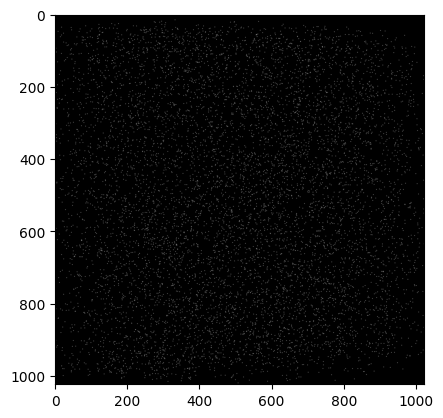

In [5]:
# load img
imgIO = lpt.math.ImageIO()
imgIO.loadImgPath('../../test/inputs/test_ObjectFinder/', 'test_function_1.txt')
img = imgIO.loadImg(0)

img_np = lpt.math.matrix_to_numpy(img)
plt.imshow(img_np, cmap='gray')


In [6]:
# define tracer property: [max_intensity, min_intensity, r_px]
property = [255,30,2]
tr2dList = lpt.object.ObjectFinder2D().findObject2D(img, property)
print('Find tracers:', len(tr2dList))

for i in range(2):
    tr2dList[i]._pt_center.print()
    print(tr2dList[i]._r_px)

Find tracers: 8110

Matrix = 
(dim_row, dim_col) = (2,1)
| 3.317e+02 |
| 1.562e+01 |

2.0

Matrix = 
(dim_row, dim_col) = (2,1)
| 2.946e+02 |
| 1.936e+01 |

2.0


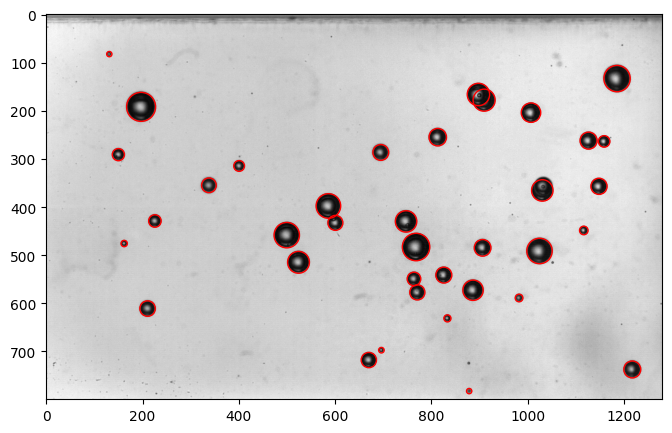

In [2]:
# load bubble image
imgIO = lpt.math.ImageIO()
imgIO.loadImgPath('../../test/inputs/test_ObjectFinder/', 'test_function_2.txt')
img = imgIO.loadImg(0)
img_np = lpt.math.matrix_to_numpy(img)

# invert image
n_val = img.getDimRow() * img.getDimCol()
for i in range(n_val):
    img[i] = (2**16-1) - img[i]

# define bubble property: [rmin,rmax,sensitivity]
bubble_property = [5, 50, 0.85]
bb2d_list = lpt.object.ObjectFinder2D().findBubble2D(img, bubble_property)


# plot
def draw_circle(pt, r, color='red'):
    circle = plt.Circle((pt[0], pt[1]), r, color=color, fill=False)
    plt.gca().add_artist(circle)

plt.figure(figsize=(8, 5))
plt.imshow(img_np, cmap='gray')
for bb2d in bb2d_list:
    draw_circle(bb2d._pt_center, bb2d._r_px, color='red')
